In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## Introduction

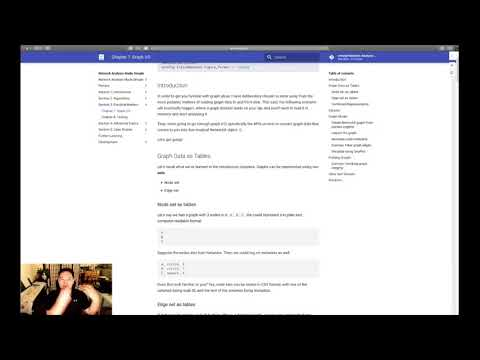

In [3]:
from IPython.display import YouTubeVideo

YouTubeVideo(id="3sJnTpeFXZ4", width="100%")

In order to get you familiar with graph ideas,
I have deliberately chosen to steer away from
the more pedantic matters
of loading graph data to and from disk.
That said, the following scenario will eventually happen,
where a graph dataset lands on your lap,
and you'll need to load it in memory 
and start analyzing it.

Thus, we're going to go through graph I/O,
specifically the APIs on how to convert
graph data that comes to you
into that magical NetworkX object `G`.

Let's get going!

## Graph Data as Tables

Let's recall what we've learned in the introductory chapters.
Graphs can be represented using two **sets**:

- Node set
- Edge set

### Node set as tables

Let's say we had a graph with 3 nodes in it: `A, B, C`.
We could represent it in plain text, computer-readable format:

```csv
A
B
C
```

Suppose the nodes also had metadata.
Then, we could tag on metadata as well:

```csv
A, circle, 5
B, circle, 7
C, square, 9
```

Does this look familiar to you?
Yes, node sets can be stored in CSV format,
with one of the columns being node ID,
and the rest of the columns being metadata.

### Edge set as tables

If, between the nodes, we had 4 edges (this is a directed graph),
we can also represent those edges in plain text, computer-readable format:

```csv
A, C
B, C
A, B
C, A
```

And let's say we also had other metadata,
we can represent it in the same CSV format:

```csv
A, C, red
B, C, orange
A, B, yellow
C, A, green
```

If you've been in the data world for a while,
this should not look foreign to you.
Yes, edge sets can be stored in CSV format too!
Two of the columns represent the nodes involved in an edge,
and the rest of the columns represent the metadata.

### Combined Representation

In fact, one might also choose to combine
the node set and edge set tables together in a merged format:

```
n1, n2, colour, shape1, num1, shape2, num2
A,  C,  red,    circle, 5,    square, 9
B,  C,  orange, circle, 7,    square, 9
A,  B,  yellow, circle, 5,    circle, 7
C,  A,  green,  square, 9,    circle, 5
```

In this chapter, the datasets that we will be looking at
are going to be formatted in both ways.
Let's get going.

## Dataset

We will be working with the Divvy bike sharing dataset.

> Divvy is a bike sharing service in Chicago.
> Since 2013, Divvy has released their bike sharing dataset to the public.
> The 2013 dataset is comprised of two files: 
> - `Divvy_Stations_2013.csv`, containing the stations in the system, and
> - `DivvyTrips_2013.csv`, containing the trips.

Let's dig into the data!

In [2]:
from pyprojroot import here

Firstly, we need to unzip the dataset:

In [3]:
import zipfile
import os
import sys
if not (r'C:\Users\pui_s\Documents\concordia-bootcamps\Network-Analysis-Made-Simple' in sys.path):
    sys.path.insert(0, r'C:\Users\pui_s\Documents\concordia-bootcamps\Network-Analysis-Made-Simple')
from nams.load_data import datasets

# This block of code checks to make sure that a particular directory is present.
if "divvy_2013" not in os.listdir(datasets):
    print('Unzipping the divvy_2013.zip file in the datasets folder.')
    with zipfile.ZipFile(datasets / "divvy_2013.zip","r") as zip_ref:
        zip_ref.extractall(datasets)

Now, let's load in both tables.

First is the `stations` table:

In [4]:
import pandas as pd

stations = pd.read_csv(datasets / 'divvy_2013/Divvy_Stations_2013.csv', parse_dates=['online date'], encoding='utf-8')

In [6]:
stations.head(10)

,id,name,latitude,longitude,dpcapacity,landmark,online date
0,5,State St & Harrison St,41.873958,-87.627739,19,30,2013-06-28
1,13,Wilton Ave & Diversey Pkwy,41.932500,-87.652681,19,66,2013-06-28
2,14,Morgan St & 18th St,41.858086,-87.651073,15,163,2013-06-28
3,15,Racine Ave & 18th St,41.858181,-87.656487,15,164,2013-06-28
4,16,Wood St & North Ave,41.910329,-87.672516,15,223,2013-08-12
5,17,Wood St & Division St,41.903320,-87.672730,15,246,2013-06-28
6,19,Loomis St & Taylor St,41.869417,-87.660996,15,139,2013-06-28
7,20,Sheffield Ave & Kingsbury St,41.909592,-87.653497,15,154,2013-06-28
8,21,Aberdeen St & Jackson Blvd,41.877726,-87.654787,15,157,2013-06-28
9,22,May St & Taylor St,41.869482,-87.655486,15,160,2013-06-28


> `id` and `node` are distinct, so we can potentially use any of the two as node labelling. Depending on the applicaton, one might be more convenient than the other.

In [7]:
stations.describe()

,id,latitude,longitude,dpcapacity,landmark
count,300.000000,300.000000,300.000000,300.000000,300.000000
mean,189.063333,41.896276,-87.648220,16.800000,192.013333
std,99.484487,0.040952,0.023001,4.673987,120.534789
min,5.000000,41.788746,-87.707857,11.000000,1.000000
25%,108.750000,41.871814,-87.665824,15.000000,83.750000
50%,196.500000,41.894611,-87.648626,15.000000,184.500000
75%,276.250000,41.926397,-87.631809,19.000000,288.250000
max,351.000000,41.978353,-87.580715,47.000000,440.000000


Now, let's load in the `trips` table.

In [5]:
trips = pd.read_csv(datasets / 'divvy_2013/Divvy_Trips_2013.csv', 
                    parse_dates=['starttime', 'stoptime'], low_memory=False)

In [11]:
trips.head(10)

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthday
0,4118,2013-06-27 12:11:00,2013-06-27 12:16:00,480,316,85,Michigan Ave & Oak St,28,Larrabee St & Menomonee St,Customer,NaN,NaN
1,4275,2013-06-27 14:44:00,2013-06-27 14:45:00,77,64,32,Racine Ave & Congress Pkwy,32,Racine Ave & Congress Pkwy,Customer,NaN,NaN
2,4291,2013-06-27 14:58:00,2013-06-27 15:05:00,77,433,32,Racine Ave & Congress Pkwy,19,Loomis St & Taylor St,Customer,NaN,NaN
3,4316,2013-06-27 15:06:00,2013-06-27 15:09:00,77,123,19,Loomis St & Taylor St,19,Loomis St & Taylor St,Customer,NaN,NaN
4,4342,2013-06-27 15:13:00,2013-06-27 15:27:00,77,852,19,Loomis St & Taylor St,55,Halsted St & James M Rochford St,Customer,NaN,NaN
5,4480,2013-06-27 19:40:00,2013-06-27 22:28:00,27,10105,340,Clark St & Wrightwood Ave,46,Wells St & Walton St,Customer,NaN,NaN
6,4490,2013-06-27 18:45:00,2013-06-27 19:03:00,418,1094,37,Dearborn St & Adams St,76,Lake Shore Dr & Monroe St,Customer,NaN,NaN
7,4592,2013-06-27 19:34:00,2013-06-27 19:51:00,170,1020,90,Millennium Park,75,Canal St & Jackson Blvd,Customer,NaN,NaN
8,4602,2013-06-27 19:45:00,2013-06-27 20:42:00,353,3419,37,Dearborn St & Adams St,37,Dearborn St & Adams St,Customer,NaN,NaN
9,4607,2013-06-27 19:46:00,2013-06-27 19:57:00,369,653,51,Clark St & Randolph St,340,Clark St & Wrightwood Ave,Customer,NaN,NaN


In [9]:
# import janitor
# trips_summary = (
#     trips
#     .groupby(["from_station_id", "to_station_id"])
#     .count()
#     .reset_index()
#     .select_columns(
#         [
#             "from_station_id", 
#             "to_station_id", 
#             "trip_id"
#         ]
#     )
#     .rename_column("trip_id", "num_trips")
# )

AttributeError: 'DataFrame' object has no attribute 'select_columns'

In [21]:
trips_summary = trips.groupby(["from_station_id", 
                               "to_station_id"]).count().reset_index()[["from_station_id", 
                                                                        "to_station_id", "trip_id"]].rename({"trip_id":
                                                                                                             "num_trips"}, axis='columns')

In [22]:
trips_summary.head()

,from_station_id,to_station_id,num_trips
0,5,5,232
1,5,13,1
2,5,14,15
3,5,15,9
4,5,16,4


In [18]:
trips_summary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44422 entries, 0 to 44421
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   from_station_id  44422 non-null  int64
 1   to_station_id    44422 non-null  int64
 2   num_trips        44422 non-null  int64
dtypes: int64(3)
memory usage: 1.0 MB


## Graph Model

Given the data, if we wished to use a graph as a data model
for the number of trips between stations,
then naturally, nodes would be the stations,
and edges would be trips between them.

This graph would be directed,
as one could have more trips from station A to B
and less in the reverse.

With this definition,
we can begin graph construction!

### Create NetworkX graph from pandas edgelist

NetworkX provides an extremely convenient way
to load data from a pandas DataFrame:

In [16]:
import networkx as nx

G = nx.from_pandas_edgelist(
    df=trips_summary,
    source="from_station_id",
    target="to_station_id",
    edge_attr=["num_trips"],
    create_using=nx.DiGraph
)

### Inspect the graph

Once the graph is in memory,
we can inspect it to get out summary graph statistics.

In [17]:
print(nx.info(G))

Name: 
Type: DiGraph
Number of nodes: 300
Number of edges: 44422
Average in degree: 148.0733
Average out degree: 148.0733


You'll notice that the edge metadata have been added correctly: we have recorded in there the number of trips between stations.

In [19]:
list(G.edges(data=True))[0:5]

[(5, 5, {'num_trips': 232}),
 (5, 13, {'num_trips': 1}),
 (5, 14, {'num_trips': 15}),
 (5, 15, {'num_trips': 9}),
 (5, 16, {'num_trips': 4})]

However, the node metadata is not present:

In [23]:
list(G.nodes(data=True))[0:5]

[(5, {}), (13, {}), (14, {}), (15, {}), (16, {})]

In [35]:
Gt = G.copy()
attrs = {85: {'name': "Michigan Ave & Oak St"}}
# nx.set_node_attributes(Gt, attrs)
nx.set_node_attributes(Gt, attrs)

In [36]:
Gt.nodes[85]

{'name': 'Michigan Ave & Oak St'}

### Annotate node metadata

We have rich station data on hand,
such as the longitude and latitude of each station,
and it would be a pity to discard it,
especially when we can potentially use it as part of the analysis
or for visualization purposes.
Let's see how we can add this information in.

Firstly, recall what the `stations` dataframe looked like:

In [37]:
stations.head()

,id,name,latitude,longitude,dpcapacity,landmark,online date
0,5,State St & Harrison St,41.873958,-87.627739,19,30,2013-06-28
1,13,Wilton Ave & Diversey Pkwy,41.932500,-87.652681,19,66,2013-06-28
2,14,Morgan St & 18th St,41.858086,-87.651073,15,163,2013-06-28
3,15,Racine Ave & 18th St,41.858181,-87.656487,15,164,2013-06-28
4,16,Wood St & North Ave,41.910329,-87.672516,15,223,2013-08-12


The `id` column gives us the node ID in the graph,
so if we set `id` to be the index,
if we then also loop over each row,
we can treat the rest of the columns as dictionary keys
and values as dictionary values,
and add the information into the graph.

Let's see this in action.

In [38]:
for node, metadata in stations.set_index("id").iterrows():
    for key, val in metadata.items():
        G.nodes[node][key] = val

Now, our node metadata should be populated.

In [39]:
list(G.nodes(data=True))[0:5]

[(5,
  {'name': 'State St & Harrison St',
   'latitude': 41.87395806,
   'longitude': -87.62773949,
   'dpcapacity': 19,
   'landmark': 30,
   'online date': Timestamp('2013-06-28 00:00:00')}),
 (13,
  {'name': 'Wilton Ave & Diversey Pkwy',
   'latitude': 41.93250008,
   'longitude': -87.65268082,
   'dpcapacity': 19,
   'landmark': 66,
   'online date': Timestamp('2013-06-28 00:00:00')}),
 (14,
  {'name': 'Morgan St & 18th St',
   'latitude': 41.858086,
   'longitude': -87.651073,
   'dpcapacity': 15,
   'landmark': 163,
   'online date': Timestamp('2013-06-28 00:00:00')}),
 (15,
  {'name': 'Racine Ave & 18th St',
   'latitude': 41.85818061,
   'longitude': -87.65648665,
   'dpcapacity': 15,
   'landmark': 164,
   'online date': Timestamp('2013-06-28 00:00:00')}),
 (16,
  {'name': 'Wood St & North Ave',
   'latitude': 41.910329,
   'longitude': -87.672516,
   'dpcapacity': 15,
   'landmark': 223,
   'online date': Timestamp('2013-08-12 00:00:00')})]

In `nxviz`, a `GeoPlot` object is available
that allows you to quickly visualize
a graph that has geographic data.
However, being `matplotlib`-based,
it is going to be quickly overwhelmed
by the sheer number of edges.

As such, we are going to first filter the edges.

### Exercise: Filter graph edges

> Leveraging what you know about how to manipulate graphs,
> now try _filtering_ edges.
>

_Hint: NetworkX graph objects can be deep-copied using `G.copy()`:_

```python
G_copy = G.copy()
```

_Hint: NetworkX graph objects also let you remove edges:_

```python
G.remove_edge(node1, node2)  # does not return anything
```

In [41]:
def filter_graph(G, minimum_num_trips):
    """
    Filter the graph such that 
    only edges that have minimum_num_trips or more
    are present.
    """
    G_filtered = G.copy()
    for u, v, d in G.edges(data=True):
        if d['num_trips'] < minimum_num_trips:
            G_filtered.remove_edge(u, v)
    return G_filtered

# from nams.solutions.io import filter_graph

G_filtered = filter_graph(G, 50)

In [42]:
G_filtered.nodes(data=True)

NodeDataView({5: {'name': 'State St & Harrison St', 'latitude': 41.87395806, 'longitude': -87.62773949, 'dpcapacity': 19, 'landmark': 30, 'online date': Timestamp('2013-06-28 00:00:00')}, 13: {'name': 'Wilton Ave & Diversey Pkwy', 'latitude': 41.93250008, 'longitude': -87.65268082, 'dpcapacity': 19, 'landmark': 66, 'online date': Timestamp('2013-06-28 00:00:00')}, 14: {'name': 'Morgan St & 18th St', 'latitude': 41.858086, 'longitude': -87.651073, 'dpcapacity': 15, 'landmark': 163, 'online date': Timestamp('2013-06-28 00:00:00')}, 15: {'name': 'Racine Ave & 18th St', 'latitude': 41.85818061, 'longitude': -87.65648665, 'dpcapacity': 15, 'landmark': 164, 'online date': Timestamp('2013-06-28 00:00:00')}, 16: {'name': 'Wood St & North Ave', 'latitude': 41.910329, 'longitude': -87.672516, 'dpcapacity': 15, 'landmark': 223, 'online date': Timestamp('2013-08-12 00:00:00')}, 17: {'name': 'Wood St & Division St', 'latitude': 41.90332, 'longitude': -87.67273, 'dpcapacity': 15, 'landmark': 246, 'o

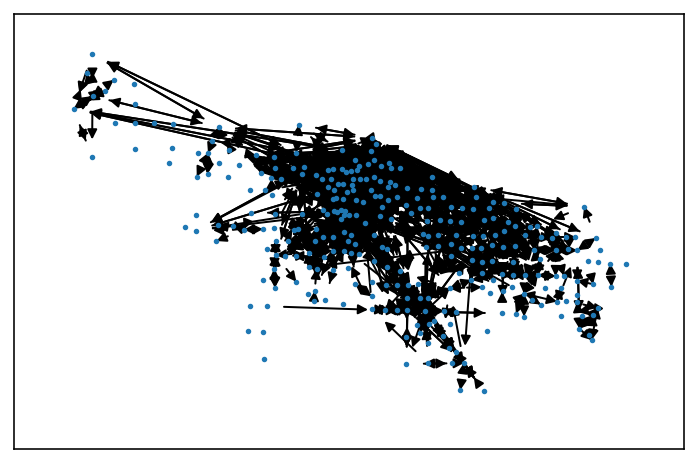

In [53]:
import matplotlib.pyplot as plt
import numpy as np
# drawing network using lat and long to visualize if theb bike network resemble the city 
locs = {n: np.array([di['latitude'], di['longitude']]) for n, di in G_filtered.nodes(data=True)}
nx.draw_networkx_nodes(G_filtered, pos=locs, node_size=3)
nx.draw_networkx_edges(G_filtered, pos=locs)
plt.show()

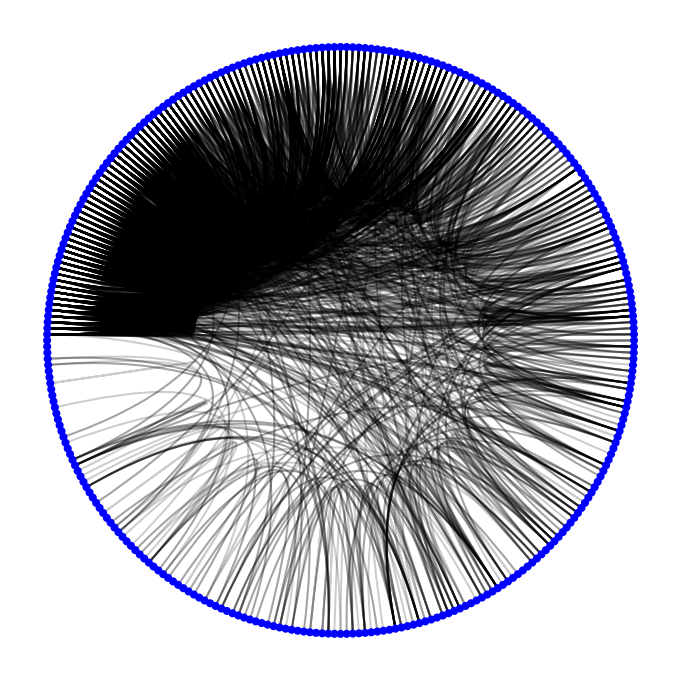

In [55]:
# lest try circle plot (less preferable in this case)
import nxviz as nv
# first we have to annotate the connectivity of each node, so given by the number of neighbors that any nodes
# is connected to
for n in G_filtered.nodes():
    G_filtered.nodes[n]['connectivity'] = len(list(G.neighbors(n)))
c = nv.CircosPlot(G_filtered, node_order = 'connectivity')
c.draw()
plt.show()

### Visualize using GeoPlot

`nxviz` provides a GeoPlot object
that lets you quickly visualize geospatial graph data.

A note on geospatial visualizations:

> As the creator of `nxviz`,
> I would recommend using proper geospatial packages
> to build custom geospatial graph viz,
> such as [`pysal`](http://pysal.org/).)
> 
> That said, `nxviz` can probably do what you need
> for a quick-and-dirty view of the data.

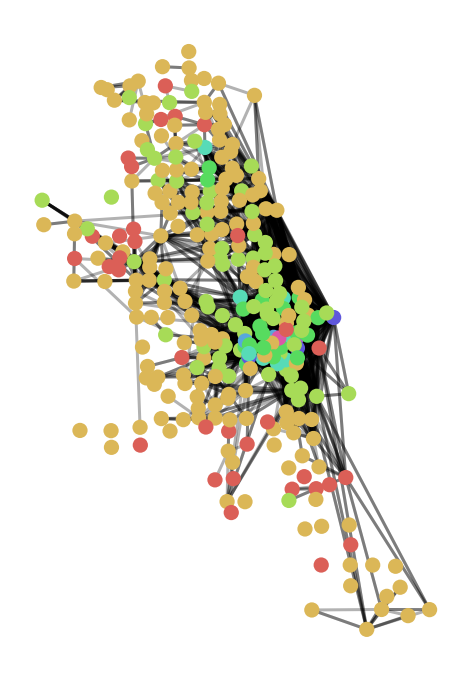

In [60]:
# import nxviz as nv

c = nv.GeoPlot(G_filtered, node_lat='latitude', node_lon='longitude', node_color="dpcapacity")
c.draw()
plt.show()

Does that look familiar to you? Looks quite a bit like Chicago, I'd say :)

Jesting aside, this visualization does help illustrate
that the majority of trips occur between stations that are
near the city center.

## Pickling Graphs

Since NetworkX graphs are Python objects,
the canonical way to save them is by pickling them.
You can do this using:

```python
nx.write_gpickle(G, file_path)
```

Here's an example in action:

In [62]:
nx.write_gpickle(G, r"divvy.pkl")

And just to show that it can be loaded back into memory:

In [63]:
G_loaded = nx.read_gpickle(r"divvy.pkl")

### Exercise: checking graph integrity

If you get a graph dataset as a pickle,
you should always check it against reference properties
to make sure of its data integrity.

> Write a function that tests that the graph
> has the correct number of nodes and edges inside it.

In [ ]:
def test_graph_integrity(G):
    """Test integrity of raw Divvy graph."""
    # Your solution here
    pass
    

In [65]:
from nams.solutions.io import test_graph_integrity

test_graph_integrity(G)

None


In [66]:
test_graph_integrity??

Signature: test_graph_integrity(G)
Source:   
def test_graph_integrity(G):
    """Test integrity of raw Divvy graph."""
    assert len(G.nodes()) == 300
    assert len(G.edges()) == 44422
File:      c:\users\pui_s\documents\concordia-bootcamps\network-analysis-made-simple\nams\solutions\io.py
Type:      function


## Other text formats

CSV files and `pandas` DataFrames
give us a convenient way to store graph data,
and if possible, do insist with your data collaborators
that they provide you with graph data that are in this format.
If they don't, however, no sweat!
After all, Python is super versatile.

In this ebook, we have loaded data in
from non-CSV sources,
sometimes by parsing text files raw,
sometimes by treating special characters as delimiters in a CSV-like file,
and sometimes by resorting to parsing JSON.

You can see other examples of how we load data
by browsing through the source file of `load_data.py`
and studying how we construct graph objects.

## Solutions

The solutions to this chapter's exercises are below

In [ ]:
from nams.solutions import io
import inspect

print(inspect.getsource(io))